In this notebook, a clustering of the obtained texts will be done in order to verify the labels they were given originally at the moment of downloading.

# Importaciones de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scikitplot.cluster import plot_elbow_curve
from scikitplot.metrics import plot_silhouette
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from src.preparation.data_access.obtained_text_da import ObtainedTextDA
from typing import List
%matplotlib inline

/home/hans/Documentos/Tesis_Chatbot/.env/lib/python3.8/site-packages/sqlalchemy/orm/util.py:104: SAWarning: The 'delete-orphan' cascade option requires 'delete'.
  util.warn(


# Obteniendo los daots

In [2]:
ot_da = ObtainedTextDA()
texts = ot_da.select_all_as_dataframe()
texts.head()

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,category,cluster_grade,filename,grade,id
0,3.197442,1.065814,50.892619,15.454303,30.109246,1.065814,0.099526,0.079630,0.236967,0.148887,...,0.0,0.000000,2.398082,10.125233,110.578204,"Historia, Geografía y Economía",None,atahualpa.txt,1.0,1.0
1,2.828854,0.848656,49.504950,11.598303,33.663366,0.565771,0.159722,0.119540,0.291667,0.197797,...,0.0,0.848656,2.545969,8.769448,94.766620,"Historia, Geografía y Economía",None,avelino_caceres.txt,1.0,2.0
2,3.475239,1.737619,58.210252,11.294526,40.834057,0.868810,0.026316,0.019822,0.197368,0.150034,...,0.0,5.212858,1.737619,9.556907,149.435274,"Historia, Geografía y Economía",None,cartilla_fenomeno_nino.txt,1.0,3.0
3,3.530450,2.647838,63.548102,10.591350,44.130627,2.647838,0.035714,0.039216,0.166667,0.142577,...,0.0,9.708738,0.000000,9.708738,151.809356,"Historia, Geografía y Economía",None,cartilla_inundaciones.txt,1.0,4.0
4,3.479990,2.485707,49.714144,13.174248,30.325628,0.248571,0.151515,0.171011,0.430303,0.273384,...,0.0,0.000000,1.739995,10.688541,93.711161,"Historia, Geografía y Economía",None,enrique_meiggs.txt,1.0,5.0


# Helper functions

In [3]:
def drop_dataset_unnecessary_columns(dataset: pd.DataFrame, cols_to_drop: List[str], target_col: str) -> (pd.DataFrame, pd.DataFrame):
    '''
    This function drops the columns from the dataset and returns X and y.
    
    Parameters:
    dataset(pd.DataFrame): The dataframe whose columns to drop.
    cols_to_drop(List[str]): The name of the columns to drop.
    target_col(str): The name of the target column.
    
    Returns:
    (pd.DataFrame, pd.DataFrame): X and y datasets.
    '''
    X = dataset.drop(columns=cols_to_drop).copy()
    X.dropna(inplace=True)
    y = dataset[target_col].copy()
    return X, y

In [4]:
def pca(dataset: pd.DataFrame, n_components: int=2):
    '''
    This function does the principal component analysis.
    
    Parameters:
    dataset(pd.DataFrame): The dataset to reduce dimensionality.
    n_components(int): The amount of dimensions to reduce the dataset:
    
    Returns:
    '''
    pca = PCA(n_components=n_components)
    pca.fit(dataset)
    X = pca.transform(dataset)
    return X

In [14]:
def plot_multiple_silhouette(data, clusters: int=1):
    '''
    This function plots the silhouette plot for different amount of clusters.
    '''
    for i in range(2, clusters+1):
        clf = KMeans(n_clusters=i, random_state=43)
        clf.fit(data)
        cluster_labels = clf.predict(data)
        plot_silhouette(data, cluster_labels)
        plt.show()

# Clustering with all the data

## All indices

### Splitting the dataset

In [6]:
X_all, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'cluster_grade', 'grade', 'id'], 'grade')
X_all.head()

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDADV,WRDNOUN,WRDPRO,WRDPRP1p,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB
0,3.197442,1.065814,50.892619,15.454303,30.109246,1.065814,0.099526,0.079630,0.236967,0.148887,...,21.582734,338.395950,38.635758,0.000000,0.000000,0.0,0.000000,2.398082,10.125233,110.578204
1,2.828854,0.848656,49.504950,11.598303,33.663366,0.565771,0.159722,0.119540,0.291667,0.197797,...,25.176803,305.516266,38.189533,0.848656,0.565771,0.0,0.848656,2.545969,8.769448,94.766620
2,3.475239,1.737619,58.210252,11.294526,40.834057,0.868810,0.026316,0.019822,0.197368,0.150034,...,38.227628,278.019114,32.145960,0.000000,0.000000,0.0,5.212858,1.737619,9.556907,149.435274
3,3.530450,2.647838,63.548102,10.591350,44.130627,2.647838,0.035714,0.039216,0.166667,0.142577,...,47.661077,265.666372,52.956752,0.000000,0.000000,0.0,9.708738,0.000000,9.708738,151.809356
4,3.479990,2.485707,49.714144,13.174248,30.325628,0.248571,0.151515,0.171011,0.430303,0.273384,...,26.348496,325.130500,38.528461,0.000000,0.000000,0.0,0.000000,1.739995,10.688541,93.711161


In [7]:
X_all_two_dim = pd.DataFrame(pca(X_all, 2), columns=['X', 'Y'])
X_all_two_dim

,X,Y
0,-14831.708976,-576.807399
1,-15052.672004,-597.777172
2,-17436.001514,-509.943641
3,-17453.097463,-496.906271
4,-14563.855177,-594.852101
...,...,...
179,2222.947837,-296.263711
180,48957.472036,-132.573092
181,79080.286912,-4287.176560
182,4332.093731,-916.911141


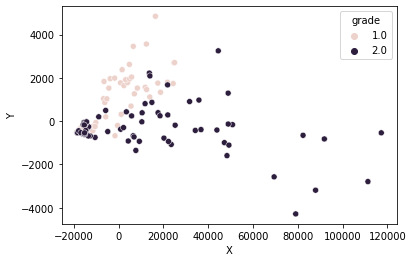

In [8]:
sns.scatterplot(data=pd.concat([X_all_two_dim, y], axis=1), x='X', y='Y', hue='grade')
plt.show()

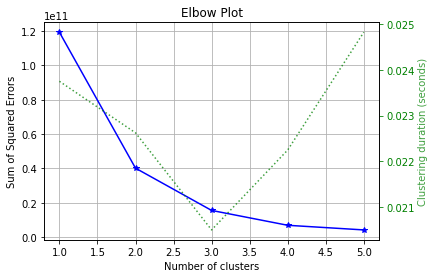

In [23]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_all, cluster_ranges=range(1, 6))
plt.show()

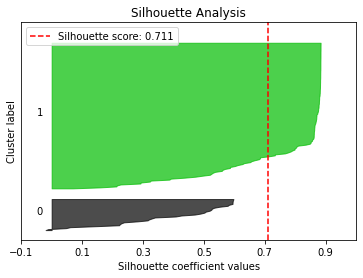

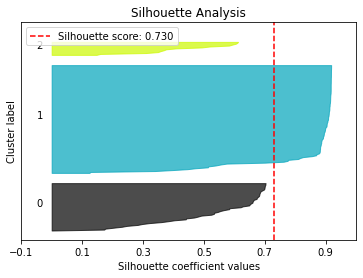

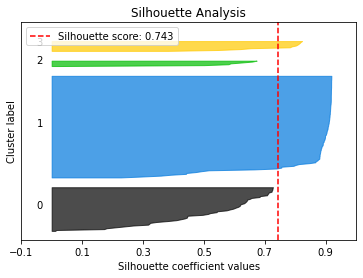

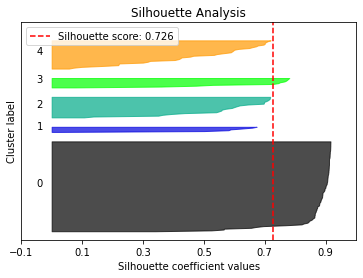

In [24]:
plot_multiple_silhouette(X_all, 5)

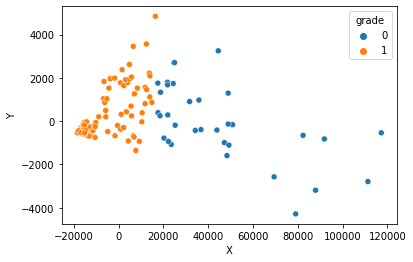

In [31]:
clf = KMeans(n_clusters=2, random_state=43)
clf.fit(X_all)
cluster_labels = pd.DataFrame(clf.predict(X_all), columns=['grade'])
sns.scatterplot(data=pd.concat([X_all_two_dim, cluster_labels], axis=1), x='X', y='Y', hue='grade')
plt.show()